# This notebook is for the Applied Data Science Capstone project

In [73]:
import pandas as pd
import numpy as np
from geopy.geocoders import Nominatim # module to convert an address into latitude and longitude values
import requests
import folium
from sklearn.cluster import KMeans

In [2]:
print('Hello Capstone Project Course!')

Hello Capstone Project Course!


# Question one

In [30]:
import pandas as pd
import re
url = 'https://en.wikipedia.org/wiki/List_of_postal_codes_of_Canada:_M'
pd.read_html(url)
dfs = pd.read_html(url)
a = []
b = []
c = []
pattern = '^([a-zA-Z0-9]{3})'
pattern1 = '^[a-zA-Z0-9]{3}([\s\S]*)\({0,1}'

df = dfs[0]
for i in df.index:
    for j in range(9):
        a.append(re.findall(pattern,df[j][i]))
        y = (re.findall(pattern1,df[j][i]))
        b.append((y[0].split("("))[0])
        try:
            c.append(((y[0].split("("))[1]).split(")")[0])
        except:
            c.append(0)

df = pd.DataFrame(a)
df.rename(columns={0:'Postal Code'},inplace=True)
df['Borough'] = pd.DataFrame(b)
df['Neighbourhoods'] = pd.DataFrame(c)
df = df[~(df['Borough'] == 'Not assigned')]
df['Latitude'] = ""
df['Longitude'] = ""
df

,Postal Code,Borough,Neighbourhoods,Latitude,Longitude
2,M3A,North York,Parkwoods,,
3,M4A,North York,Victoria Village,,
4,M5A,Downtown Toronto,Regent Park / Harbourfront,,
5,M6A,North York,Lawrence Manor / Lawrence Heights,,
6,M7A,Queen's Park,Ontario Provincial Government,,
...,...,...,...,...,...
160,M8X,Etobicoke,The Kingsway / Montgomery Road / Old Mill North,,
165,M4Y,Downtown Toronto,Church and Wellesley,,
168,M7Y,East TorontoBusiness reply mail Processing Cen...,Enclave of M4L,,
169,M8Y,Etobicoke,Old Mill South / King's Mill Park / Sunnylea /...,,


In [7]:
df.describe()

,Postal Code,Borough,Neighbourhoods,Latitude,Longitude
count,103,103,103,103,103
unique,103,15,98,1,1
top,M3B,North York,Downsview,,
freq,1,24,4,103,103


In [39]:
df1 = df.loc[0:25]
df2 = df.loc[26:50]
df3 = df.loc[51:75]
df4 = df.loc[76:102]

In [40]:
to_drop_unknown = []
geolocator = Nominatim(user_agent="ny_explorer")
for index, row in df1.iterrows():
    address = str(row['Neighbourhoods']) + ', Toronto'
    try:
        location = geolocator.geocode(address)
        latitude = location.latitude
        longitude = location.longitude
        print('The geograpical coordinate of {} are {}, {}.'.format(address, latitude, longitude))
        df1.loc[index, 'Latitude'] = latitude
        df1.loc[index, 'Longitude'] = longitude
    except AttributeError:
        print('Cannot do: {}, will drop index: {}'.format(address, index))
        to_drop_unknown.append(index)

The geograpical coordinate of Parkwoods, Toronto are 43.7611243, -79.3240594.


c:\users\preet\python\python38\lib\site-packages\pandas\core\indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-40-1578d289b6b9>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.loc[index, 'Latitude'] = latitude
<ipython-input-40-1578d289b6b9>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.loc[index, 'Longitude'] = longitude


The geograpical coordinate of Victoria Village, Toronto are 43.732658, -79.3111892.
Cannot do: Regent Park / Harbourfront, Toronto, will drop index: 4
The geograpical coordinate of Lawrence Manor / Lawrence Heights, Toronto are 43.7164765, -79.4424487.
Cannot do: Ontario Provincial Government, Toronto, will drop index: 6
The geograpical coordinate of Islington Avenue, Toronto are 43.7161378, -79.5555531.
The geograpical coordinate of Malvern / Rouge, Toronto are 43.8091955, -79.2217008.
The geograpical coordinate of Don Mills, Toronto are 43.775347, -79.3459439.
The geograpical coordinate of Parkview Hill / Woodbine Gardens, Toronto are 43.7145315, -79.30948979272151.
Cannot do: Garden District, Ryerson, Toronto, will drop index: 13
The geograpical coordinate of Glencairn, Toronto are 43.7087117, -79.4406853.
Cannot do: West Deane Park / Princess Gardens / Martin Grove / Islington / Cloverdale, Toronto, will drop index: 17
Cannot do: Rouge Hill / Port Union / Highland Creek, Toronto, w

In [51]:
df1.drop(to_drop_unknown, inplace=True)
df1

c:\users\preet\python\python38\lib\site-packages\pandas\core\frame.py:3990: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


,Postal Code,Borough,Neighbourhoods,Latitude,Longitude
2,M3A,North York,Parkwoods,43.7611,-79.3241
3,M4A,North York,Victoria Village,43.7327,-79.3112
5,M6A,North York,Lawrence Manor / Lawrence Heights,43.7165,-79.4424
8,M9A,Etobicoke,Islington Avenue,43.7161,-79.5556
9,M1B,Scarborough,Malvern / Rouge,43.8092,-79.2217
11,M3B,North York,Don Mills,43.7753,-79.3459
12,M4B,East York,Parkview Hill / Woodbine Gardens,43.7145,-79.3095
14,M6B,North York,Glencairn,43.7087,-79.4407
20,M3C,North York,Don Mills,43.7753,-79.3459
21,M4C,East York,Woodbine Heights,43.6999,-79.3193


In [45]:
to_drop_unknown = []
geolocator = Nominatim(user_agent="ny_explorer")
for index, row in df2.iterrows():
    address = str(row['Neighbourhoods']) + ', Toronto'
    try:
        location = geolocator.geocode(address)
        latitude = location.latitude
        longitude = location.longitude
        print('The geograpical coordinate of {} are {}, {}.'.format(address, latitude, longitude))
        df2.loc[index, 'Latitude'] = latitude
        df2.loc[index, 'Longitude'] = longitude
    except AttributeError:
        print('Cannot do: {}, will drop index: {}'.format(address, index))
        to_drop_unknown.append(index)

Cannot do: Eringate / Bloordale Gardens / Old Burnhamthorpe / Markland Wood, Toronto, will drop index: 26
The geograpical coordinate of Guildwood / Morningside / West Hill, Toronto are 43.7907925, -79.19369853569341.


c:\users\preet\python\python38\lib\site-packages\pandas\core\indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-45-0f5d16c9e560>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2.loc[index, 'Latitude'] = latitude
<ipython-input-45-0f5d16c9e560>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2.loc[index, 'Longitude'] = longitude


The geograpical coordinate of The Beaches, Toronto are 43.6710244, -79.296712.
The geograpical coordinate of Berczy Park, Toronto are 43.64798435, -79.37539591138858.
Cannot do: Caledonia-Fairbanks, Toronto, will drop index: 32
The geograpical coordinate of Woburn, Toronto are 43.7598243, -79.2252908.
The geograpical coordinate of Leaside, Toronto are 43.7047983, -79.3680904.
The geograpical coordinate of Central Bay Street, Toronto are 43.6561192, -79.38467.
The geograpical coordinate of Christie, Toronto are 43.6641106, -79.4184051.
The geograpical coordinate of Cedarbrae, Toronto are 43.75646655, -79.22669244258802.
The geograpical coordinate of Hillcrest Village, Toronto are 43.6816953, -79.4257118.
Cannot do: Bathurst Manor / Wilson Heights / Downsview North, Toronto, will drop index: 47
The geograpical coordinate of Thorncliffe Park, Toronto are 43.704553, -79.3454074.
The geograpical coordinate of Richmond / Adelaide / King, Toronto are 43.6502975, -79.38047735048377.
The geogra

In [46]:
df2.drop(to_drop_unknown, inplace=True)
df2

,Postal Code,Borough,Neighbourhoods,Latitude,Longitude
27,M1E,Scarborough,Guildwood / Morningside / West Hill,43.7908,-79.1937
30,M4E,East Toronto,The Beaches,43.671,-79.2967
31,M5E,Downtown Toronto,Berczy Park,43.648,-79.3754
36,M1G,Scarborough,Woburn,43.7598,-79.2253
39,M4G,East York,Leaside,43.7048,-79.3681
40,M5G,Downtown Toronto,Central Bay Street,43.6561,-79.3847
41,M6G,Downtown Toronto,Christie,43.6641,-79.4184
45,M1H,Scarborough,Cedarbrae,43.7565,-79.2267
46,M2H,North York,Hillcrest Village,43.6817,-79.4257
48,M4H,East York,Thorncliffe Park,43.7046,-79.3454


In [48]:
to_drop_unknown = []
geolocator = Nominatim(user_agent="ny_explorer")
for index, row in df3.iterrows():
    address = str(row['Neighbourhoods']) + ', Toronto'
    try:
        location = geolocator.geocode(address)
        latitude = location.latitude
        longitude = location.longitude
        df3.loc[index, 'Latitude'] = latitude
        df3.loc[index, 'Longitude'] = longitude
    except AttributeError:
        to_drop_unknown.append(index)
df3.drop(to_drop_unknown, inplace=True)
df3

c:\users\preet\python\python38\lib\site-packages\pandas\core\indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-48-7e1e8d653f18>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3.loc[index, 'Latitude'] = latitude
<ipython-input-48-7e1e8d653f18>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3.loc[index, 'Longitude'] = longitude
c:\users\preet\python\python38\

,Postal Code,Borough,Neighbourhoods,Latitude,Longitude
54,M1J,Scarborough,Scarborough Village,43.7437,-79.2116
57,M4J,East YorkEast Toronto,The Danforth East,43.6882,-79.3018
64,M2K,North York,Bayview Village,43.7692,-79.3767
65,M3K,North York,Downsview,43.7493,-79.4622
66,M4K,East Toronto,The Danforth West / Riverdale,43.667,-79.3478
73,M2L,North York,York Mills / Silver Hills,43.7573,-79.3603
74,M3L,North York,Downsview,43.7493,-79.4622


In [50]:
to_drop_unknown = []
geolocator = Nominatim(user_agent="ny_explorer")
for index, row in df4.iterrows():
    address = str(row['Neighbourhoods']) + ', Toronto'
    try:
        location = geolocator.geocode(address)
        latitude = location.latitude
        longitude = location.longitude
        df4.loc[index, 'Latitude'] = latitude
        df4.loc[index, 'Longitude'] = longitude
    except AttributeError:
        to_drop_unknown.append(index)
df4.drop(to_drop_unknown, inplace=True)
df4

c:\users\preet\python\python38\lib\site-packages\pandas\core\indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-50-9c9cf76f390c>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df4.loc[index, 'Latitude'] = latitude
<ipython-input-50-9c9cf76f390c>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df4.loc[index, 'Longitude'] = longitude
c:\users\preet\python\python38\

,Postal Code,Borough,Neighbourhoods,Latitude,Longitude
80,M9L,North York,Humber Summit,43.7601,-79.5718
82,M2M,North York,Willowdale / Newtonbrook,43.7896,-79.4176
83,M3M,North York,Downsview,43.7493,-79.4622
84,M4M,East Toronto,Studio District,43.6431,-79.4026
91,M2N,North York,Willowdale,43.7615,-79.4109
92,M3N,North York,Downsview,43.7493,-79.4622
93,M4N,Central Toronto,Lawrence Park,43.7292,-79.4033
94,M5N,Central Toronto,Roselawn,43.706,-79.4212
95,M6N,York,Runnymede / The Junction North,43.6611,-79.4803
98,M9N,York,Weston,43.7002,-79.5162


In [56]:
df = df1.append(df2, ignore_index = True)
df = df.append(df3, ignore_index = True)
df = df.append(df4, ignore_index = True)
df.head()

,Postal Code,Borough,Neighbourhoods,Latitude,Longitude
0,M3A,North York,Parkwoods,43.7611,-79.3241
1,M4A,North York,Victoria Village,43.7327,-79.3112
2,M6A,North York,Lawrence Manor / Lawrence Heights,43.7165,-79.4424
3,M9A,Etobicoke,Islington Avenue,43.7161,-79.5556
4,M1B,Scarborough,Malvern / Rouge,43.8092,-79.2217


In [82]:
a = []
for i,j in zip(df['Latitude'], df['Longitude']):
    a.append((i,j))


# Using KMeans clustering to cluster borough into 3 groups

In [95]:
clf = KMeans(n_clusters = 3, random_state = 0).fit(a)
clf.labels_

array([0, 0, 2, 2, 1, 0, 0, 2, 0, 0, 0, 2, 1, 0, 0, 1, 0, 0, 2, 1, 2, 0,
       0, 2, 1, 0, 0, 2, 0, 0, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 0])

In [96]:
m=folium.Map(location=[43.6979,-79.3973], zoom_start=11)
for lat, lon, city, label in zip(df['Latitude'], df['Longitude'], df['Borough'], clf.labels_):
    folium.CircleMarker(
        [lat, lon],
        radius=8,
        popup = city,
        fill_color=label * 'blue' + (1-label) * 'red',
        fill=True,
        fill_opacity=1
        ).add_to(m)
m

In [1]:
from PIL import Image

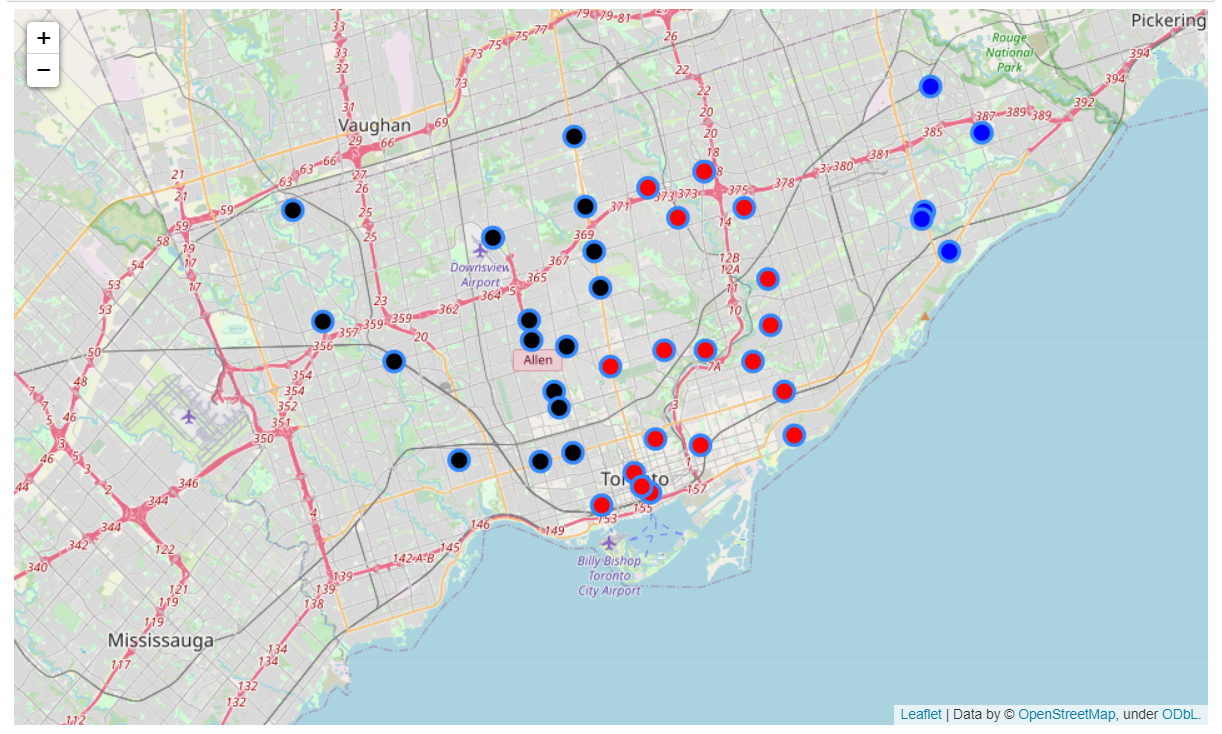

In [7]:
filename = "Map.png"
image = Image.open(filename)
image